# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Drop the Id columns from both train and test as these are not needed for prediction

In [2]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

#### Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

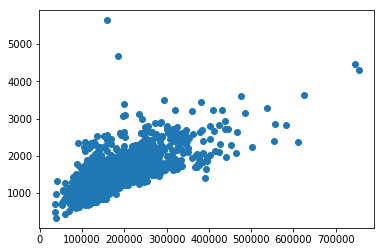

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.scatter(train['SalePrice'], train['GrLivArea'])
plt.show()

#### Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

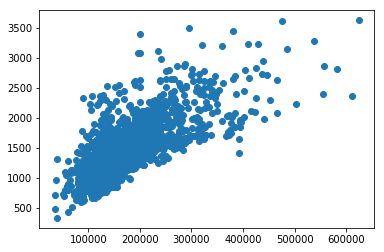

In [4]:
# Remove outliers for train['GrLivArea']>4000
under4000 = train[train['GrLivArea']<4000]

# TODO: Scatter plot
plt.scatter(under4000['SalePrice'], under4000['GrLivArea'])
plt.show()

#### Convert categorical variable into dummy variables using pandas get_dummies API


In [5]:
under4000dummies = pd.get_dummies(under4000)

#### Impute missing data by the mean of each column.

In [6]:
clean = under4000dummies.fillna(under4000dummies.mean())

Generate train test split 70/30

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean.iloc[:,:-2],clean.iloc[:,-1], test_size=.7, random_state=42)

## Linear Regression

In [8]:
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import sqrt

# Fit a linear regression model to this data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)

# Compute the RMSE 
sqrt(mean_squared_error(y_predict, y_test))

0.05550885052340753

## Lasso Regression

#### Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)

In [9]:
from sklearn import linear_model

# TODO: fit a Lasso regression model to this data
alphas = 10**np.linspace(6,-2,50)*0.5

lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso = linear_model.Lasso()
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("rmse = ",sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

Alpha= 1.4130027992303755e-05
rmse =  0.054231185199272246


#### How many columns has the model chosen?

In [10]:
import numpy as np

print("# Coefficients greater than zero:")
np.sum(pd.Series(lasso.coef_, index=X_train.columns) < 0)

# Coefficients greater than zero:


14

## Ridge Regression

#### Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range). 

In [11]:
ridgecv = linear_model.RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)
print("Alpha=", ridgecv.alpha_)
ridge6 = linear_model.Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_train, y_train)
print("rmse = ",sqrt(mean_squared_error(y_test, ridge6.predict(X_test))))

Alpha= 0.005
rmse =  0.06114408641768761


#### What is your root mean squared error (RMSE)? Comment on your observation.

In [12]:
# Compute the RMSE 
sqrt(mean_squared_error(y_predict, y_test))

0.05550885052340753

In [13]:
print("# Coefficients greater than zero:")
np.sum(pd.Series(ridge6.coef_, index=X_train.columns) < 0)

# Coefficients greater than zero:


139

## Elastic Net Regression

#### Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [14]:
# TODO: fit the Elastic net regression model to this data
elstcv = linear_model.ElasticNetCV(alphas=alphas)
# TODO: Compute the RMSE
elstcv.fit(X_train, y_train)
print("Alpha=", elstcv.alpha_)
print("rmse = ",sqrt(mean_squared_error(y_test, elstcv.predict(X_test))))
print("best model coefficients:")
print("# Coefficients greater than zero:")
np.sum(pd.Series(ridge6.coef_, index=X_train.columns) < 0)



/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Alpha= 0.005
rmse =  0.057651546511883006
best model coefficients:
# Coefficients greater than zero:


139